## 1. Data Cleaning and Preparation

In this section, we clean and prepare all the datasets needed for our gold price prediction model:
- Jakarta Stock Exchange Index
- Gold Price Data
- Inflation Data
- WTI Crude Oil Prices
- Bank Indonesia 7-day Reverse Repo Rate
- USD/IDR Exchange Rate

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Jakarta Stock Exchange Data Cleaning

In [23]:
def clean_jakarta_stock_exchange(df=None):
    df = pd.read_excel("[DATASET] AoL Data Mining Kelompok 7/IHSG.xlsx")
    print("Raw Jakarta Stock Exchange Data Sample:")
    display(df.head())

    # Convert 'Tanggal' to datetime
    df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

    # Set the 'Tanggal' column as index
    df.set_index('Tanggal', inplace=True)

    # Use min and max date from dataset to create date range
    start_date = df.index.min()
    end_date = df.index.max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Reindex the dataframe to include all dates
    df_resampled = df.reindex(all_dates)

    # Forward fill missing values
    df_resampled.ffill(inplace=True)

    # Reset the index and rename it to 'Date'
    df_resampled.reset_index(inplace=True)
    df_resampled.rename(columns={'index': 'Date'}, inplace=True)

    print("\nCleaned Jakarta Stock Exchange Data Sample:")
    display(df_resampled.head())

    return df_resampled

### 1.2 Gold Price Data Cleaning

In [24]:
def clean_gold_price(df=None):
    df = pd.read_excel("[DATASET] AoL Data Mining Kelompok 7/Harga Emas.xlsx")

    print("Raw Gold Price Data Sample:")
    display(df.head())

    # Convert to datetime and extract date only
    df['date'] = pd.to_datetime(df['date']).dt.date

    # Drop duplicates (keeping first occurrence /date)
    df = df.drop_duplicates(subset='date', keep='first')

    # Set date as index
    df.set_index('date', inplace=True)

    # Use index for min/max dates
    start_date = df.index.min()
    end_date = df.index.max()

    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Create empty DataFrame with complete date range
    complete_df = pd.DataFrame(index=all_dates)

    # Join with original data
    complete_df = complete_df.join(df, how='left')

    # Forward fill missing values
    complete_df['price'] = complete_df['price'].ffill()

    # Reset index to make Date column
    complete_df.reset_index(inplace=True)
    complete_df.rename(columns={'index': 'Date'}, inplace=True)

    print("\nCleaned Gold Price Data Sample:")
    display(complete_df.head())

    return complete_df

### 1.3 Inflation Data Cleaning

In [25]:
def clean_inflation_data(df=None):
    df = pd.read_excel("[DATASET] AoL Data Mining Kelompok 7/Data Inflasi.xlsx")

    print("Raw Inflation Data Sample:")
    display(df.head())

    # Clean and process the data
    month_mapping = {
        'Januari': 'January',
        'Februari': 'February',
        'Maret': 'March',
        'April': 'April',
        'Mei': 'May',
        'Juni': 'June',
        'Juli': 'July',
        'Agustus': 'August',
        'September': 'September',
        'Oktober': 'October',
        'November': 'November',
        'Desember': 'December'
    }

    # Convert Indonesian dates to datetime
    def convert_periode(indonesian_periode):
        month, year = indonesian_periode.split()
        english_month = month_mapping[month]
        return pd.to_datetime(f"1 {english_month} {year}")  # Using 1st of each month

    df['Date'] = df['Periode'].apply(convert_periode)
    df['Data Inflasi'] = df['Data Inflasi'].str.replace(' %', '').astype(float)

    # Create complete daily data
    start_date = df['Date'].min()
    end_date = df['Date'].max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Create daily DataFrame and merge with inflation data
    daily_df = pd.DataFrame({'Date': all_dates})
    daily_df['YearMonth'] = daily_df['Date'].dt.to_period('M')
    df['YearMonth'] = df['Date'].dt.to_period('M')

    result = pd.merge(daily_df, df[['YearMonth', 'Data Inflasi']],
                    on='YearMonth', how='left')

    final_df = result[['Date', 'Data Inflasi']]

    print("\nCleaned Inflation Data Sample:")
    display(final_df.head())

    return final_df

### 1.4 WTI Crude Oil Price Data Cleaning

In [26]:
def clean_wti_oil_price(df=None):
    df = pd.read_excel("[DATASET] AoL Data Mining Kelompok 7/Harga Minyak Mentah Dunia.xlsx")

    print("Raw WTI Crude Oil Price Data Sample:")
    display(df.head())

    # Convert 'Tanggal' to datetime
    df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

    # Set the 'Tanggal' column as index
    df.set_index('Tanggal', inplace=True)

    # Create complete daily data
    start_date = df.index.min()
    end_date = df.index.max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Reindex the dataframe to include all dates
    df_resampled = df.reindex(all_dates)

    # Forward fill missing values
    df_resampled.ffill(inplace=True)

    # Reset the index and rename it to 'Date'
    df_resampled.reset_index(inplace=True)
    df_resampled.rename(columns={'index': 'Date'}, inplace=True)

    print("\nCleaned WTI Crude Oil Price Data Sample:")
    display(df_resampled.head())

    return df_resampled

### 1.5 Bank Indonesia 7-day Repo Rate Data Cleaning

In [27]:
def clean_bi_7day_rr(df=None):
    df = pd.read_excel("[DATASET] AoL Data Mining Kelompok 7/Suku Bunga BI.xlsx")

    print("Raw BI 7-day Reverse Repo Rate Data Sample:")
    display(df.head())

    # Clean and process the data
    month_mapping = {
        'Januari': 'January',
        'Februari': 'February',
        'Maret': 'March',
        'April': 'April',
        'Mei': 'May',
        'Juni': 'June',
        'Juli': 'July',
        'Agustus': 'August',
        'September': 'September',
        'Oktober': 'October',
        'November': 'November',
        'Desember': 'December'
    }

    # Convert Indonesian dates to datetime
    def convert_date(indonesian_date):
        day, month, year = indonesian_date.split()
        english_month = month_mapping[month]
        return pd.to_datetime(f"{day} {english_month} {year}")

    df['Date'] = df['Tanggal'].apply(convert_date)
    df['BI-7Day-RR'] = df['BI-7Day-RR'].str.replace(' %', '').astype(float)

    # Create complete daily data
    start_date = df['Date'].min()
    end_date = df['Date'].max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    daily_df = pd.DataFrame({'Date': all_dates})

    # Merge with monthly rates
    daily_df['YearMonth'] = daily_df['Date'].dt.to_period('M')
    df['YearMonth'] = df['Date'].dt.to_period('M')

    result = pd.merge(daily_df, df[['YearMonth', 'BI-7Day-RR']],
                    on='YearMonth', how='left')
    # Forward fill missing values
    result['BI-7Day-RR'] = result['BI-7Day-RR'].ffill()

    # Format final output
    final_df = result[['Date', 'BI-7Day-RR']]

    print("\nCleaned BI 7-day Reverse Repo Rate Data Sample:")
    display(final_df.head())

    return final_df

### 1.6 USD Exchange Rate Data Cleaning

In [28]:
def clean_usd_exchange_rate(df=None):
    df = pd.read_excel("[DATASET] AoL Data Mining Kelompok 7/Kurs Transaksi IDR-USD.xlsx")

    print("Raw USD Exchange Rate Data Sample:")
    display(df.head())

    # Convert 'Tanggal' to datetime (strip time part)
    df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%m/%d/%Y %I:%M:%S %p')

    # Set the 'Tanggal' column as index
    df.set_index('Tanggal', inplace=True)

    # Create complete daily data using index
    start_date = df.index.min()
    end_date = df.index.max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Reindex the dataframe to include all dates
    df_resampled = df.reindex(all_dates)

    # Forward fill missing values
    df_resampled.ffill(inplace=True)

    # Reset the index to move 'Tanggal' back to a column
    df_resampled.reset_index(inplace=True)
    df_resampled.rename(columns={'index': 'Date'}, inplace=True)

    print("\nCleaned USD Exchange Rate Data Sample:")
    display(df_resampled.head())

    return df_resampled


## 2. Data Integration

We'll now load and clean all datasets, then merge them into a single dataset for analysis.

In [29]:
def load_clean_and_merge_datasets():

    jse = clean_jakarta_stock_exchange()
    gold = clean_gold_price()
    inflation = clean_inflation_data()
    oil = clean_wti_oil_price()
    interest = clean_bi_7day_rr()
    usd = clean_usd_exchange_rate()

    # Standardize column names
    jse.rename(columns={'Tanggal': 'Date', 'Terakhir': 'JSE_Index'}, inplace=True)
    jse = jse[['Date', 'JSE_Index']]
    gold.rename(columns={'date': 'Date', 'price': 'Gold_Price'}, inplace=True)
    inflation.rename(columns={'Data Inflasi': 'Inflation'}, inplace=True)
    oil.rename(columns={'Tanggal': 'Date', 'Terakhir': 'Oil_Price'}, inplace=True)
    oil = oil[['Date', 'Oil_Price']]
    usd.rename(columns={'Tanggal': 'Date'}, inplace=True)

    # Ensure all Date columns are datetime64[ns]
    for df in [gold, usd, oil, interest, inflation, jse]:
        df['Date'] = pd.to_datetime(df['Date'])

    # Starting with gold prices as our base
    data = gold.copy()

    # Merge with other datasets
    data = pd.merge(data, usd, on='Date', how='left')
    data = pd.merge(data, oil, on='Date', how='left')
    data = pd.merge(data, interest, on='Date', how='left')
    data = pd.merge(data, inflation, on='Date', how='left')
    data = pd.merge(data, jse, on='Date', how='left')

    # Filter for the specified date range
    start_date = '2016-04-01'
    end_date = '2025-02-13'
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    # Sort by date
    data = data.sort_values('Date')

    # Forward fill missing values
    data = data.ffill()

    # Create additional features
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['DayOfWeek'] = data['Date'].dt.dayofweek

    # Create lag features for gold price (previous 3 days)
    for i in range(1, 4):
        data[f'Gold_Price_Lag_{i}'] = data['Gold_Price'].shift(i)

    # Create lag features for other important variables
    for feature in ['Kurs Jual', 'Oil_Price', 'BI-7Day-RR', 'Inflation', 'JSE_Index']:
        data[f'{feature}_Lag_1'] = data[feature].shift(1)

    # Create moving averages for gold price
    data['Gold_MA_7'] = data['Gold_Price'].rolling(window=7).mean()
    data['Gold_MA_30'] = data['Gold_Price'].rolling(window=30).mean()

    # Create binary target for logistic regression
    data['Price_Change'] = data['Gold_Price'].pct_change()
    data['Price_Up'] = (data['Price_Change'] > 0.003).astype(int)

    # Drop rows with NaN values (due to lag features)
    data = data.dropna()

    print("\nMerged Dataset Information:")
    print(f"Shape: {data.shape}")
    print(f"Date Range: {data['Date'].min()} to {data['Date'].max()}")

    return data

In [30]:
data = load_clean_and_merge_datasets()

Raw Jakarta Stock Exchange Data Sample:


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,1990-04-09,633.48,633.48,633.48,633.48,NaN,-0.0121
1,1990-04-10,632.09,632.09,632.09,632.09,NaN,-0.0022
2,1990-04-11,634.69,634.69,634.69,634.69,NaN,0.0041
3,1990-04-12,639.61,639.61,639.61,639.61,NaN,0.0078
4,1990-04-16,640.01,640.01,640.01,640.01,NaN,0.0006



Cleaned Jakarta Stock Exchange Data Sample:


,Date,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,1990-04-09,633.48,633.48,633.48,633.48,NaN,-0.0121
1,1990-04-10,632.09,632.09,632.09,632.09,NaN,-0.0022
2,1990-04-11,634.69,634.69,634.69,634.69,NaN,0.0041
3,1990-04-12,639.61,639.61,639.61,639.61,NaN,0.0078
4,1990-04-13,639.61,639.61,639.61,639.61,NaN,0.0078


Raw Gold Price Data Sample:


,date,price
0,2010-01-04 09:07:00,408000
1,2010-01-05 09:28:00,410000
2,2010-01-06 07:01:00,410000
3,2010-01-07 09:45:00,412000
4,2010-01-08 09:37:00,410000



Cleaned Gold Price Data Sample:


,Date,price
0,2010-01-04,408000.0
1,2010-01-05,410000.0
2,2010-01-06,410000.0
3,2010-01-07,412000.0
4,2010-01-08,410000.0


Raw Inflation Data Sample:


,No,Periode,Data Inflasi
0,1,Januari 2025,0.76 %
1,2,Desember 2024,1.57 %
2,3,November 2024,1.55 %
3,4,Oktober 2024,1.71 %
4,5,September 2024,1.84 %



Cleaned Inflation Data Sample:


,Date,Data Inflasi
0,2002-12-01,0.0
1,2002-12-02,0.0
2,2002-12-03,0.0
3,2002-12-04,0.0
4,2002-12-05,0.0


Raw WTI Crude Oil Price Data Sample:


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2005-01-03,42.12,43.10,43.10,41.25,"69,48K",-0.0306
1,2005-01-04,43.91,42.18,44.13,41.85,"100,67K",0.0425
2,2005-01-05,43.39,43.90,44.00,42.60,"91,01K",-0.0118
3,2005-01-06,45.56,43.39,45.75,42.80,"122,41K",0.0500
4,2005-01-07,45.43,45.50,46.10,44.75,"99,73K",-0.0029



Cleaned WTI Crude Oil Price Data Sample:


,Date,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2005-01-03,42.12,43.10,43.10,41.25,"69,48K",-0.0306
1,2005-01-04,43.91,42.18,44.13,41.85,"100,67K",0.0425
2,2005-01-05,43.39,43.90,44.00,42.60,"91,01K",-0.0118
3,2005-01-06,45.56,43.39,45.75,42.80,"122,41K",0.0500
4,2005-01-07,45.43,45.50,46.10,44.75,"99,73K",-0.0029


Raw BI 7-day Reverse Repo Rate Data Sample:


,NO,Tanggal,BI-7Day-RR
0,1,15 Januari 2025,5.75 %
1,2,18 Desember 2024,6.00 %
2,3,20 November 2024,6.00 %
3,4,16 Oktober 2024,6.00 %
4,5,18 September 2024,6.00 %



Cleaned BI 7-day Reverse Repo Rate Data Sample:


,Date,BI-7Day-RR
0,2016-04-21,5.5
1,2016-04-22,5.5
2,2016-04-23,5.5
3,2016-04-24,5.5
4,2016-04-25,5.5


Raw USD Exchange Rate Data Sample:


,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,1,1,16445.82,16282.18,2/13/2025 12:00:00 AM
1,2,1,16461.90,16298.10,2/12/2025 12:00:00 AM
2,3,1,16431.75,16268.25,2/11/2025 12:00:00 AM
3,4,1,16406.63,16243.38,2/10/2025 12:00:00 AM
4,5,1,16411.65,16248.35,2/7/2025 12:00:00 AM



Cleaned USD Exchange Rate Data Sample:


,Date,NO,Nilai,Kurs Jual,Kurs Beli
0,2010-01-04,3708.0,1.0,9377.0,9283.0
1,2010-01-05,3707.0,1.0,9355.0,9261.0
2,2010-01-06,3706.0,1.0,9355.0,9261.0
3,2010-01-07,3705.0,1.0,9274.0,9182.0
4,2010-01-08,3704.0,1.0,9286.0,9194.0



Merged Dataset Information:
Shape: (3243, 26)
Date Range: 2016-04-30 00:00:00 to 2025-02-13 00:00:00


## 4. Exploratory Data Analysis

Understand the relationships between variables

In [31]:
def exploratory_data_analysis(data):
    print("Dataset Information:")
    print(f"Shape: {data.shape}")
    print(f"Date Range: {data['Date'].min()} to {data['Date'].max()}")

    print("\nBasic Statistics for Numerical Features:")
    display(data.describe())

    # Correlation matrix
    data_corr = data.rename(columns={'Kurs Jual': 'IDR/USD'})

    matfeatures = [
        'Gold_Price', 'IDR/USD', 'Oil_Price',
        'BI-7Day-RR', 'Inflation', 'JSE_Index'
    ]

    # Filter the data to those features
    selected_data = data_corr[matfeatures]

    # Compute correlation and plot heatmap
    plt.figure(figsize=(12, 10))
    correlation = selected_data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Correlation Heatmap of Main Features', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Time series of gold price
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Gold_Price'])
    plt.xlabel('Date')
    plt.ylabel('Gold Price (IDR)')
    plt.title('Gold Price Time Series', fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Distribution of gold price
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data['Gold_Price'], kde=True)
    plt.title('Distribution of Gold Price')
    plt.xlabel('Gold Price (IDR)')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data['Gold_Price'])
    plt.title('Box Plot of Gold Price')
    plt.tight_layout()
    plt.show()

    # Relationship between gold price and key features
    plt.figure(figsize=(16, 12))

    plt.subplot(2, 3, 1)
    plt.scatter(data['Kurs Jual'], data['Gold_Price'], alpha=0.5)
    plt.title('Gold Price vs. IDR/USD Exchange Rate')
    plt.xlabel('IDR/USD Exchange Rate')
    plt.ylabel('Gold Price (IDR)')

    plt.subplot(2, 3, 2)
    plt.scatter(data['Oil_Price'], data['Gold_Price'], alpha=0.5)
    plt.title('Gold Price vs. Oil Price')
    plt.xlabel('Oil Price')
    plt.ylabel('Gold Price (IDR)')

    plt.subplot(2, 3, 3)
    plt.scatter(data['BI-7Day-RR'], data['Gold_Price'], alpha=0.5)
    plt.title('Gold Price vs. BI-7Day-RR')
    plt.xlabel('BI-7Day-RR (%)')
    plt.ylabel('Gold Price (IDR)')

    plt.subplot(2, 3, 4)
    plt.scatter(data['Inflation'], data['Gold_Price'], alpha=0.5)
    plt.title('Gold Price vs. Inflation')
    plt.xlabel('Inflation (%)')
    plt.ylabel('Gold Price (IDR)')

    plt.subplot(2, 3, 5)
    plt.scatter(data['JSE_Index'], data['Gold_Price'], alpha=0.5)
    plt.title('Gold Price vs. Jakarta Stock Exchange Index')
    plt.xlabel('JSE Index')
    plt.ylabel('Gold Price (IDR)')

    plt.tight_layout()
    plt.show()

    # Top feature correlations with gold price
    gold_correlations = correlation['Gold_Price'].sort_values(ascending=False)
    print("Top correlations with Gold Price:")
    print(gold_correlations)

    # Plot top correlations
    plt.figure(figsize=(10, 6))
    gold_correlations.drop('Gold_Price').sort_values().plot(kind='barh')
    plt.title('Feature Correlation with Gold Price', fontsize=16)
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

    return gold_correlations

Dataset Information:
Shape: (3243, 26)
Date Range: 2016-04-30 00:00:00 to 2025-02-13 00:00:00

Basic Statistics for Numerical Features:


,Date,Gold_Price,NO,Nilai,Kurs Jual,Kurs Beli,Oil_Price,BI-7Day-RR,Inflation,JSE_Index,...,Gold_Price_Lag_3,Kurs Jual_Lag_1,Oil_Price_Lag_1,BI-7Day-RR_Lag_1,Inflation_Lag_1,JSE_Index_Lag_1,Gold_MA_7,Gold_MA_30,Price_Change,Price_Up
count,3243,3.243000e+03,3243.000000,3243.0,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,...,3.243000e+03,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3.243000e+03,3.243000e+03,3243.000000,3243.000000
mean,2020-09-13 06:48:57.280295936,8.923016e+05,1079.726796,1.0,14567.779880,14422.776041,64.567515,4.896007,2.968455,6255.017425,...,8.912871e+05,14566.800595,64.559692,4.895930,2.969331,6254.470096,8.912922e+05,8.875771e+05,0.000337,0.236201
min,2016-04-30 00:00:00,5.950000e+05,1.000000,1.0,12991.000000,12861.000000,11.570000,3.500000,0.760000,3937.630000,...,5.890000e+05,12991.000000,11.570000,3.500000,0.760000,3937.630000,5.920000e+05,5.875333e+05,-0.033797,0.000000
25%,2018-06-18 12:00:00,6.640000e+05,531.000000,1.0,13997.815000,13858.185000,51.835000,4.250000,2.130000,5823.475000,...,6.630000e+05,13995.315000,51.815000,4.250000,2.130000,5822.645000,6.639286e+05,6.632667e+05,-0.001712,0.000000
50%,2020-09-06 00:00:00,9.280000e+05,1092.000000,1.0,14435.820000,14292.180000,64.950000,4.750000,3.050000,6252.710000,...,9.280000e+05,14435.820000,64.930000,4.750000,3.050000,6252.350000,9.278571e+05,9.274000e+05,0.000000,0.000000
75%,2022-11-25 12:00:00,1.020000e+06,1636.500000,1.0,15172.485000,15021.515000,75.770000,5.750000,3.490000,6868.400000,...,1.019000e+06,15168.465000,75.770000,5.750000,3.490000,6868.400000,1.020000e+06,1.018833e+06,0.002663,0.000000
max,2025-02-13 00:00:00,1.692000e+06,2152.000000,1.0,16824.710000,16657.300000,119.780000,6.250000,5.950000,7905.390000,...,1.670000e+06,16824.710000,119.780000,6.250000,5.950000,7905.390000,1.674143e+06,1.624600e+06,0.066667,1.000000
std,NaN,2.504045e+05,624.146623,0.0,872.552385,863.930959,17.006492,0.929728,1.091372,738.490809,...,2.493925e+05,872.226054,17.009234,0.929668,1.090739,738.882647,2.493477e+05,2.457835e+05,0.005761,0.424813


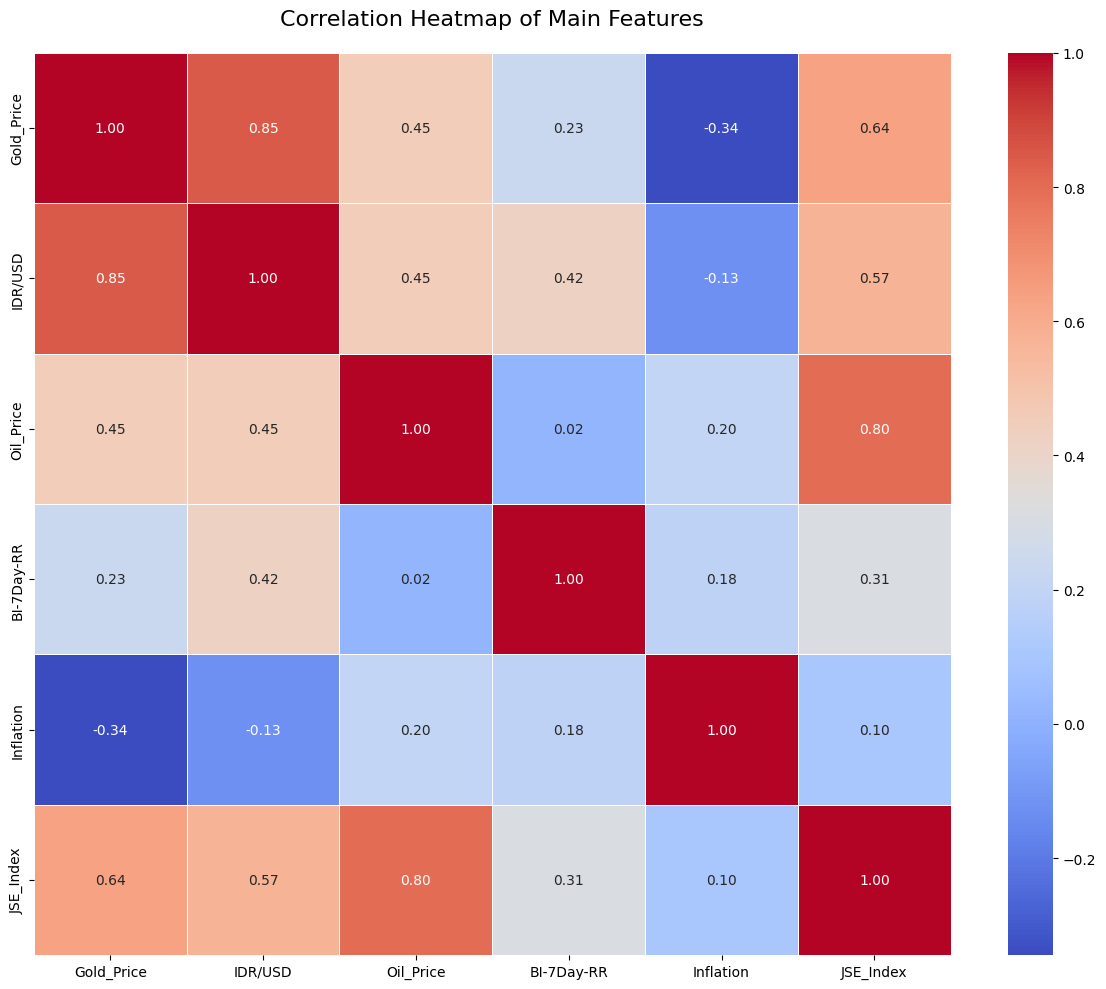

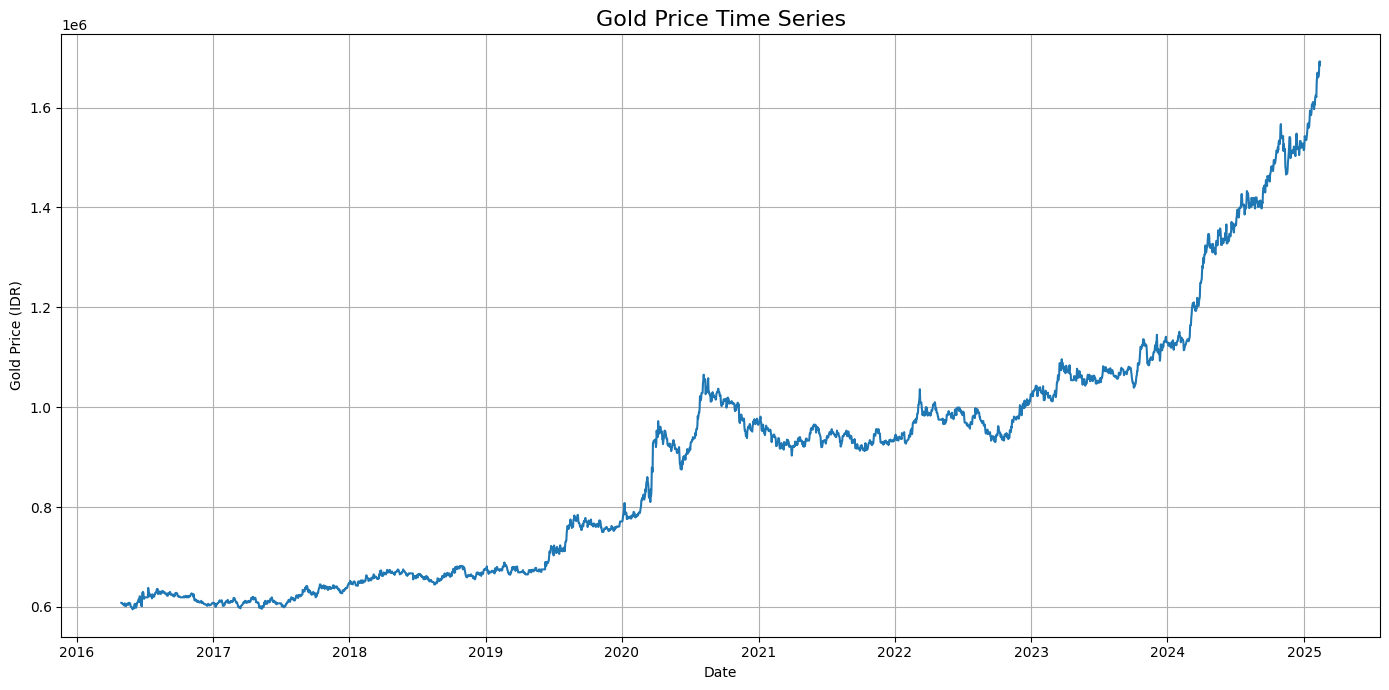

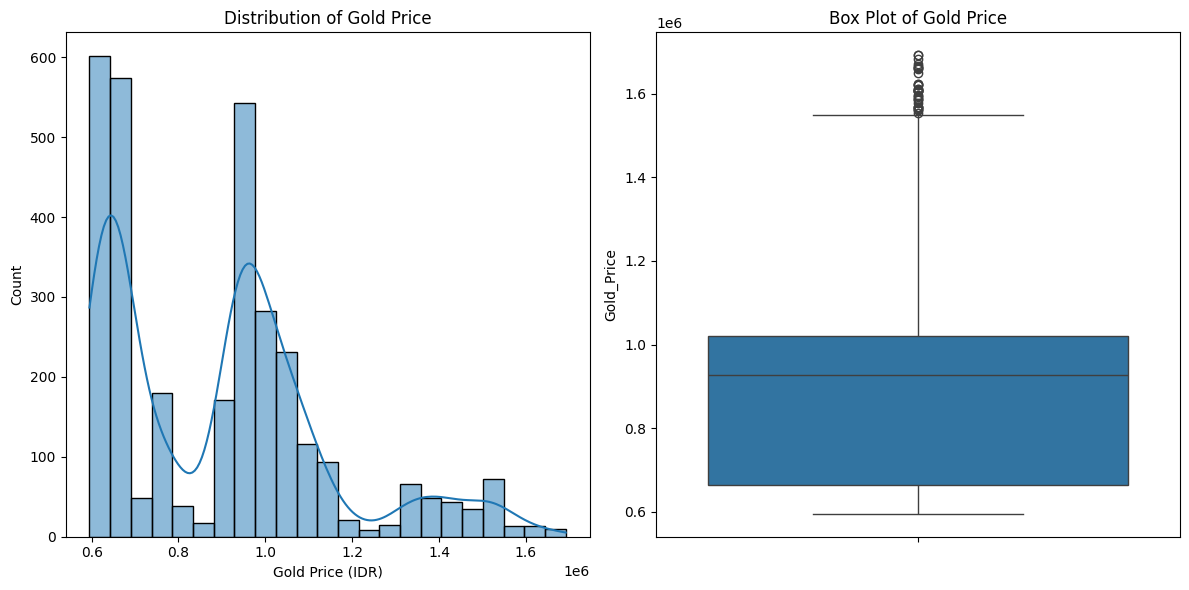

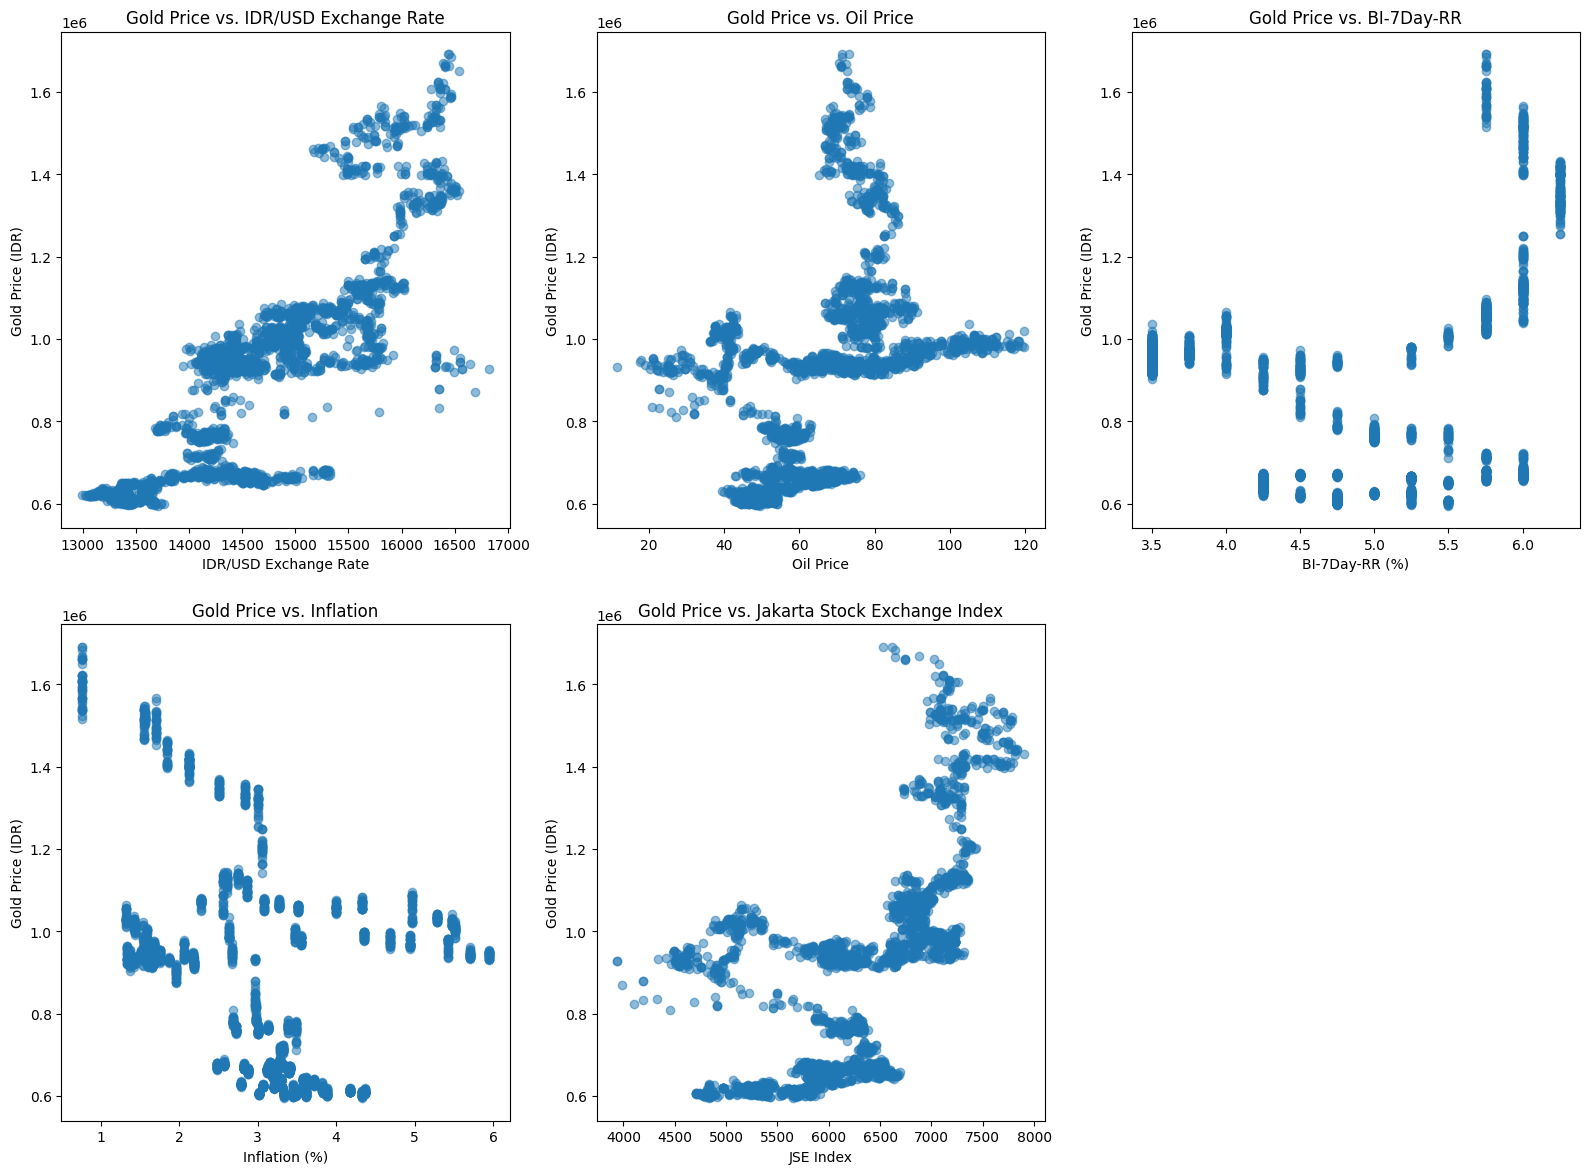

Top correlations with Gold Price:
Gold_Price    1.000000
IDR/USD       0.845916
JSE_Index     0.635052
Oil_Price     0.450304
BI-7Day-RR    0.234928
Inflation    -0.344546
Name: Gold_Price, dtype: float64


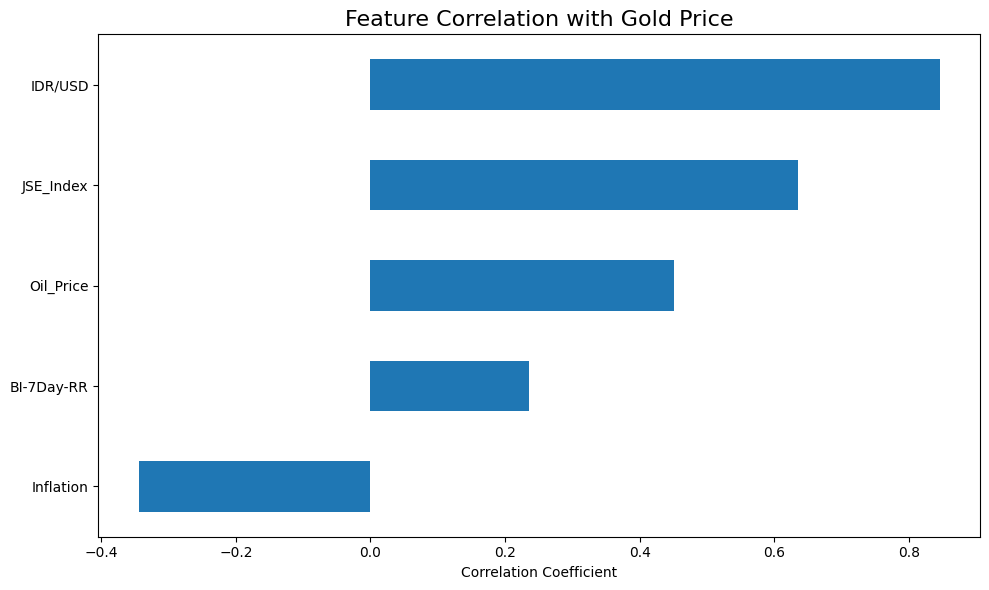

In [32]:
gold_correlations = exploratory_data_analysis(data)

## 5. Feature Engineering and Model Preparation

Prepare our features and target variables for regression modeling

In [33]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [34]:
def prepare_features(data):
    # Define features and target
    features = ['Kurs Jual', 'Kurs Beli', 'Oil_Price', 'BI-7Day-RR', 'Inflation', 'JSE_Index',
                'Year', 'Month', 'Day', 'DayOfWeek',
                'Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'Gold_Price_Lag_3',
                'Kurs Jual_Lag_1', 'Oil_Price_Lag_1', 'BI-7Day-RR_Lag_1',
                'Inflation_Lag_1', 'JSE_Index_Lag_1',
                'Gold_MA_7', 'Gold_MA_30']

    X = data[features]
    y_regression = data['Gold_Price']
    y_classification = data['Price_Up']

    # Train-test split
    X_train, X_test, y_reg_train, y_reg_test = train_test_split(
        X, y_regression, test_size=0.2, random_state=42, shuffle=False)

    _, _, y_class_train, y_class_test = train_test_split(
        X, y_classification, test_size=0.2, random_state=42, shuffle=False)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    return X_train, X_test, X_train_scaled, X_test_scaled, y_reg_train, y_reg_test, y_class_train, y_class_test, features

In [35]:
X_train, X_test, X_train_scaled, X_test_scaled, y_reg_train, y_reg_test, y_class_train, y_class_test, features = prepare_features(data)

Training data shape: (2594, 20)
Testing data shape: (649, 20)


## 6. Model Building and Evaluation

Now let's build and evaluate different regression models to predict gold prices.

### 6.1 Linear Regression

In [36]:
def build_linear_regression_model(X_train, X_test, y_train, y_test, features):
    # Train Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Make predictions
    y_pred = linear_model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nLinear Regression Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Display feature importance
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Coefficient': linear_model.coef_
    })
    feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)
    print("\nTop 10 features by importance (Linear Regression):")
    print(feature_importance.head(10))

    # Plot predictions vs actual
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Gold Price')
    plt.plot(y_test.index, y_pred, label='Predicted Gold Price')
    plt.title('Linear Regression: Actual vs Predicted Gold Prices')
    plt.xlabel('Date Index')
    plt.ylabel('Gold Price (IDR)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return linear_model, y_pred, r2


Linear Regression Results:
Mean Squared Error: 84422316.01
Root Mean Squared Error: 9188.16
Mean Absolute Error: 6756.80
R² Score: 0.9976

Top 10 features by importance (Linear Regression):
             Feature  Coefficient
6               Year  1361.018486
16   Inflation_Lag_1   906.040832
4          Inflation  -772.772116
3         BI-7Day-RR  -770.223509
15  BI-7Day-RR_Lag_1   278.651218
7              Month    88.157098
0          Kurs Jual   -52.212211
1          Kurs Beli    41.723480
9          DayOfWeek    33.548334
13   Kurs Jual_Lag_1    11.404496


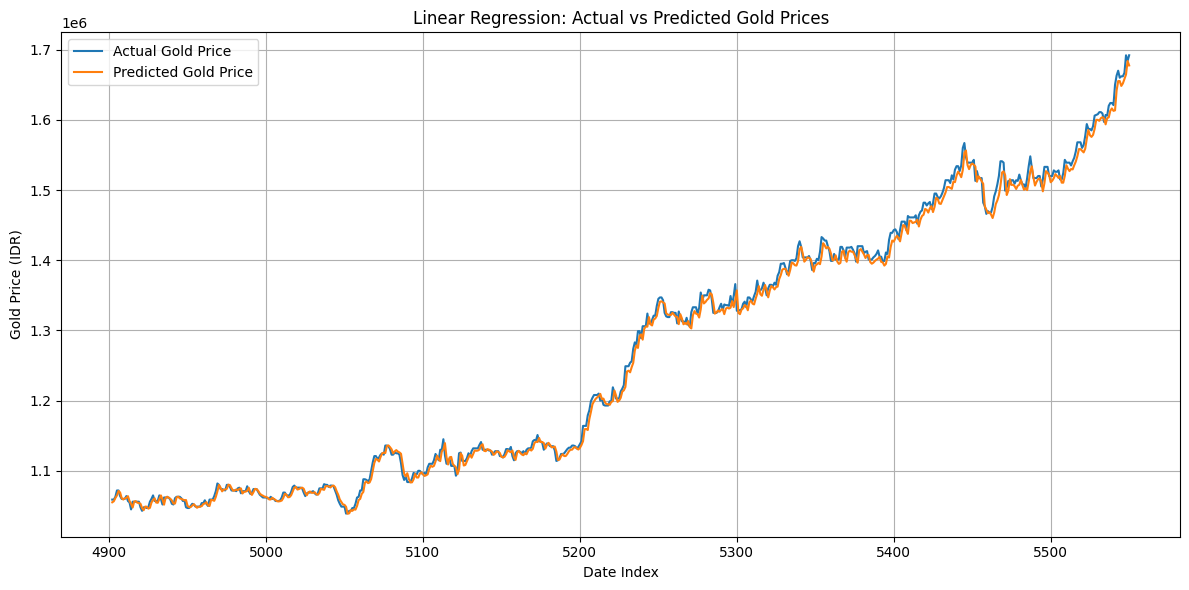

In [37]:
linear_results = build_linear_regression_model(X_train, X_test, y_reg_train, y_reg_test, features)

### 6.2 Ridge

In [38]:
def build_ridge_model(X_train, X_test, y_train, y_test, features):
    # Use time series cross-validation to respect time order
    tscv = TimeSeriesSplit(n_splits=5)

    # Define a wide range of alpha values for tuning regularization strength
    alphas = np.logspace(-3, 5, 50)

    # Standardize features since Ridge is sensitive to scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit Ridge regression with cross-validation to find the best alpha
    ridge_model = RidgeCV(alphas=alphas, cv=tscv, scoring='neg_mean_squared_error')
    ridge_model.fit(X_train_scaled, y_train)

    # Predict on train and test sets
    y_pred_train = ridge_model.predict(X_train_scaled)
    y_pred_test = ridge_model.predict(X_test_scaled)

    # Calculate residuals and performance metrics on test set
    residuals = y_test - y_pred_test
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print("\nRidge Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred_test, label='Predicted', color='red')
    plt.title(f'Ridge Regression (α={ridge_model.alpha_:.2f})\nActual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Gold Price (IDR)')
    plt.legend()
    plt.grid(True)
    plt.show()

    metrics = {
        'alpha': ridge_model.alpha_,
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2,
        'rmse': rmse
    }

    return ridge_model, y_pred_test, metrics


Ridge Results:
Mean Squared Error: 84329264.10
Root Mean Squared Error: 9183.10
Mean Absolute Error: 6750.95
R² Score: 0.9976


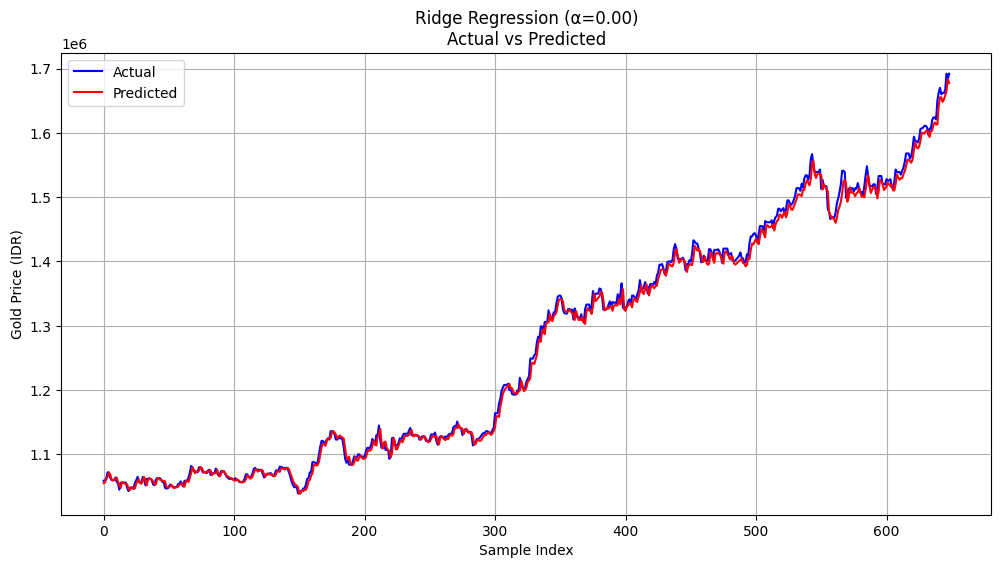

In [39]:
ridge_result = build_ridge_model(X_train, X_test, y_reg_train, y_reg_test, features)
model, predictions, r2 = ridge_result

### 6.3 Lasso

In [40]:
def build_lasso_regression_model(X_train, X_test, y_train, y_test, features, alpha=None):

    # Standardize features as Lasso is sensitive to scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Find optimal alpha using cross-validation
    if alpha is None:
        lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, random_state=42)
        lasso_cv.fit(X_train_scaled, y_train)
        alpha = lasso_cv.alpha_
        print(f"\nOptimal alpha found by CV: {alpha:.4f}")

    # Train Lasso model with selected alpha
    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = lasso_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nLasso Regression Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Number of features used: {np.sum(lasso_model.coef_ != 0)}")

    # Show top 10 features by absolute coefficient
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Coefficient': lasso_model.coef_
    })
    feature_importance['Abs_Coeff'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Abs_Coeff', ascending=False)
    print("\nTop 10 features by importance:")
    print(feature_importance.head(10))

    # Plot actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Gold Price')
    plt.plot(y_test.index, y_pred, label='Predicted Gold Price')
    plt.title('Lasso Regression: Actual vs Predicted Gold Prices')
    plt.xlabel('Date Index')
    plt.ylabel('Gold Price (IDR)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return lasso_model, y_pred, r2

c:\Users\hosea\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25260115525.67248, tolerance: 4344875936.096385
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\hosea\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24161574555.66702, tolerance: 4344875936.096385
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\hosea\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23681438625.948795, tolerance: 4344875936.096385
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\hosea\anaconda3\en


Optimal alpha found by CV: 0.1265

Lasso Regression Results:
Mean Squared Error: 94273233.82
Root Mean Squared Error: 9709.44
Mean Absolute Error: 7086.65
R² Score: 0.9973
Number of features used: 19

Top 10 features by importance:
             Feature    Coefficient      Abs_Coeff
10  Gold_Price_Lag_1  147886.275576  147886.275576
18         Gold_MA_7   17986.041634   17986.041634
17   JSE_Index_Lag_1  -10224.854380   10224.854380
5          JSE_Index    9093.747814    9093.747814
3         BI-7Day-RR   -7319.383266    7319.383266
15  BI-7Day-RR_Lag_1    6911.850447    6911.850447
19        Gold_MA_30   -6755.439345    6755.439345
16   Inflation_Lag_1    3668.682027    3668.682027
6               Year    3546.722357    3546.722357
4          Inflation   -3494.519578    3494.519578


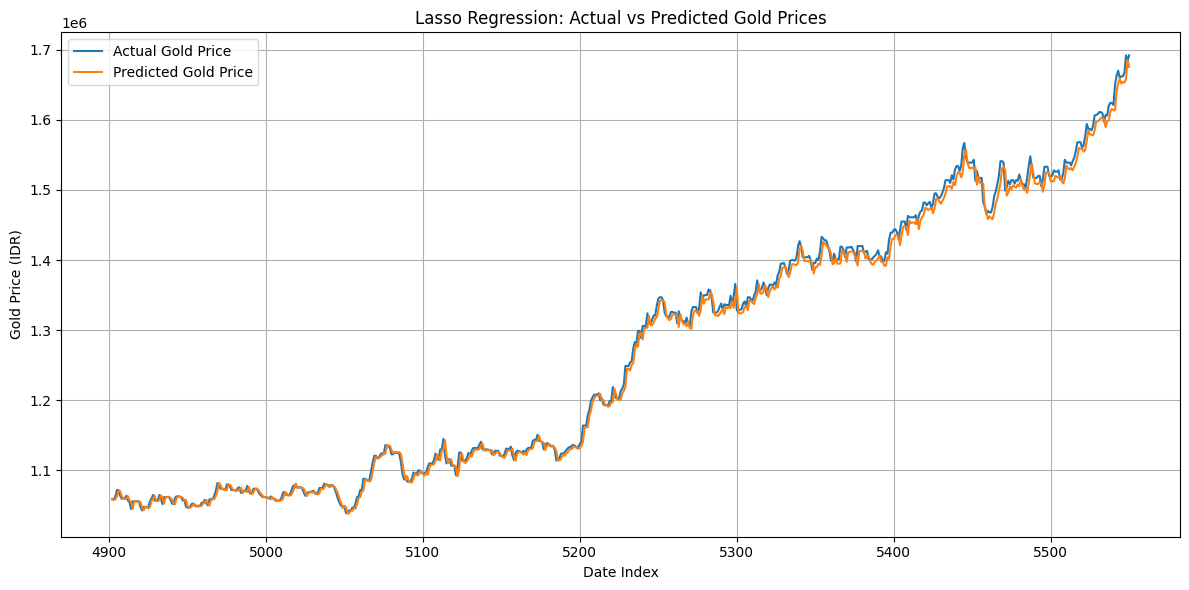

In [41]:
lasso_result = build_lasso_regression_model(X_train, X_test, y_reg_train, y_reg_test, features)
model, predictions, r2 = lasso_result